In [1]:
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
    
from datetime import datetime
import time

In [2]:
class Exponenta:
    
    def __init__(self, v_0, R, M, tau, N):
        self.v_0 = v_0
        self.R = R
        self.M = M
        self.tau = tau
        self.N = N
        
        self.x = np.linspace(-R, R, M+1)
        self.delta = self.x[1] - self.x[0]
        
        # matrices
        diag_T = 2/self.delta**2 * np.ones(M-1)
        subdiag_T = -1/self.delta**2 * np.ones(M-2)
        diags_T = [subdiag_T, diag_T, subdiag_T]
        T = scipy.sparse.diags(diags_T,[-1,0,1]).toarray()
        
        I = scipy.sparse.eye(self.M-1).toarray()
        expT_pade = (I + T * self.tau / 2) @ scipy.linalg.inv(I - T * self.tau / 2)
        
        diag_V = self.v_0*np.exp(-self.x[1:-1]**2)
        diag_expV = np.exp(diag_V * self.tau / 2)
        diags_expV = [diag_expV]
        expV = scipy.sparse.diags(diags_expV,[0]).toarray()
        
        self.A = np.linalg.matrix_power(expV @ expT_pade @ expV, N)
    
    def many_E_arnoldi_iterantion(self, k):
        w = scipy.sparse.linalg.eigs(self.A, k=k, return_eigenvectors=False)
#         w = np.log(w.real) / (self.tau * self.N)
        w = np.log(np.real(w)) / (e.tau * e.N)
        return w[(w>self.v_0)*(w<0.0)]  

In [12]:
# constants
v_0 = -5.0
R = 6.0
M = 1000
tau = -1e-5
N = 10

e = Exponenta(v_0, R, M, tau, N)

In [13]:
e.many_E_arnoldi_iterantion(10)

array([-0.40420461, -3.14035799])

In [99]:
v_0 = -5.0
R = 6.0
m = np.linspace(100, 5000, 50, dtype=int)
tau = -1e-3
N = 10
t = [None] * len(m)

for i in range(len(m)):
    start_time = datetime.now()
    
    e = Exponenta(v_0, R, m[i], tau, N)
    w = e.many_E_arnoldi_iterantion(10)
    
    t[i] = datetime.now() - start_time
    
    print('m=', m[i], ', t=', t[i])   

m= 100 , t= 0:00:00.162622
m= 148 , t= 0:00:00.171736
m= 197 , t= 0:00:00.181652
m= 246 , t= 0:00:00.230607
m= 295 , t= 0:00:00.173299
m= 344 , t= 0:00:00.177746
m= 393 , t= 0:00:00.277061
m= 442 , t= 0:00:00.364316
m= 491 , t= 0:00:00.688401
m= 540 , t= 0:00:00.796844
m= 589 , t= 0:00:00.845778
m= 638 , t= 0:00:00.962230
m= 687 , t= 0:00:01.408774
m= 736 , t= 0:00:01.591297
m= 785 , t= 0:00:01.873056
m= 834 , t= 0:00:01.843899
m= 883 , t= 0:00:02.307708
m= 932 , t= 0:00:02.813002
m= 981 , t= 0:00:03.092016
m= 1030 , t= 0:00:03.586206
m= 1079 , t= 0:00:03.986426
m= 1128 , t= 0:00:04.708168
m= 1177 , t= 0:00:04.891802
m= 1226 , t= 0:00:06.056992
m= 1275 , t= 0:00:06.414472
m= 1324 , t= 0:00:07.447063
m= 1373 , t= 0:00:08.094838
m= 1422 , t= 0:00:09.385440
m= 1471 , t= 0:00:10.879241
m= 1520 , t= 0:00:10.515245
m= 1569 , t= 0:00:12.007838
m= 1618 , t= 0:00:14.571412
m= 1667 , t= 0:00:15.587367
m= 1716 , t= 0:00:16.462726
m= 1765 , t= 0:00:17.439557
m= 1814 , t= 0:00:20.879046
m= 1863 , t

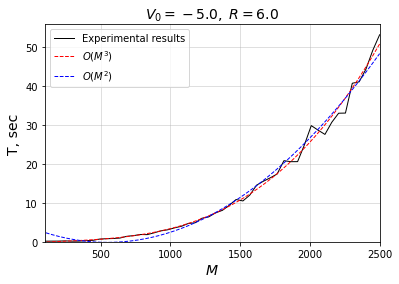

In [105]:
tt = [t_.seconds+t_.microseconds*1e-6 for t_ in t]

p3 = np.poly1d(np.polyfit(m, tt, 3))
p2 = np.poly1d(np.polyfit(m, tt, 2))
mm = np.linspace(0, m[-1])

plt.plot(m, tt, color='black', linewidth=1, label='Experimental results')

plt.plot(mm, p3(mm), color='red', linewidth=1, linestyle='--', label=r'$O(M^3)$')
plt.plot(mm, p2(mm), color='blue', linewidth=1, linestyle='--', label=r'$O(M^2)$')

plt.xlabel(r'$M$', fontsize=14)
plt.ylabel('T, sec', fontsize=14)

plt.title(fr'$V_0={v_0},\; R={R}$', fontsize=14)

plt.xlim(m[0], m[-1])
plt.ylim(0, None)

plt.grid(alpha=0.5)
plt.legend()

plt.savefig(f'figures/T_vs_M_{e.v_0}.png', bbox_inches='tight')

In [93]:
v_0 = -5.0
R = 6.0
M = 1000
N = 10

tau_ = -np.logspace(-3, -10, 10)

E = []

for i in range(len(tau_)):
    print(i)
    e = Exponenta(v_0, R, M, tau_[i], N)
    w = e.many_E_arnoldi_iterantion(10)
    E += [w]

0
1
2
3
4
5
6
7
8
9


In [95]:
E = np.array(E)
E.shape

(10, 2)

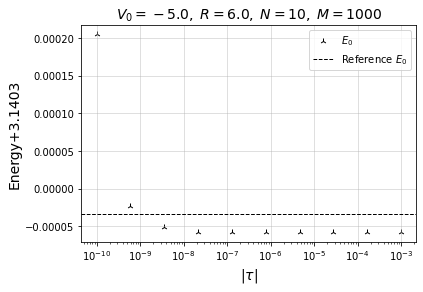

In [96]:
# plt.scatter(-tau_, E[:,0]-E[-1,0], color='black', linewidth=1, label=r'$E_1$', marker='1')
plt.scatter(abs(tau_), E[:,1]+3.1403, color='black', linewidth=1, label=r'$E_0$', marker='2')

plt.axhline(y=3.1403-3.140334020243438, color='black', linewidth=1, linestyle='--', label=r'Reference $E_0$')

plt.xlabel(r'$|\tau|$', fontsize=14)
plt.ylabel(r'Energy+3.1403', fontsize=14)

plt.title(fr'$V_0={v_0},\; R={R},\; N={N},\; M={M}$', fontsize=14)

# plt.xlim(-tau_[0]+1e-3, -tau_[-1]-3e-10)
# plt.ylim(0, None)

plt.xscale('log')

plt.grid(alpha=0.5)
plt.legend()

plt.savefig(f'figures/E_vs_tau_{e.v_0}.png', bbox_inches='tight')

In [58]:
E[:,1]-E[-1,1]

array([-2.88971444e-05, -2.89507770e-05, -2.89812937e-05, -2.89986558e-05,
       -2.90085359e-05, -2.90141582e-05, -2.90173547e-05, -2.90191805e-05,
       -2.90202096e-05, -2.90207889e-05, -2.90211297e-05, -2.90213307e-05,
       -2.90214230e-05, -2.90214467e-05, -2.90215499e-05, -2.90215887e-05,
       -2.90213783e-05, -2.90210399e-05, -2.90201172e-05, -2.90193783e-05,
       -2.90196940e-05, -2.90180665e-05, -2.90154852e-05, -2.90144339e-05,
       -2.90154344e-05, -2.89995801e-05, -2.89895612e-05, -2.89878906e-05,
       -2.89768732e-05, -2.89768858e-05, -2.89448238e-05, -2.89173011e-05,
       -2.88864946e-05, -2.87986379e-05, -2.86718163e-05, -2.86143464e-05,
       -2.83397192e-05, -2.84654556e-05, -2.80678320e-05, -2.77395106e-05,
       -2.73604172e-05, -2.64938639e-05, -2.58445248e-05, -2.26581409e-05,
       -2.01445586e-05, -1.78219132e-05, -2.28365082e-05, -1.05500328e-05,
       -4.67614502e-06,  0.00000000e+00])

In [27]:
E[-20,0], E[-1,0]

(-0.40420458467018594, -0.404151977733566)

In [11]:
E[:,1]

array([-3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787,
       -3.14035787, -3.14035787, -3.14035787, -3.14035787, -3.14035787])